### https://developers.google.com/mediapipe/solutions/vision/face_landmarker/python
### Model: https://developers.google.com/mediapipe/solutions/vision/face_landmarker/index#models
### Example: https://github.com/googlesamples/mediapipe/blob/main/examples/face_landmarker/python/%5BMediaPipe_Python_Tasks%5D_Face_Landmarker.ipynb

In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2

In [2]:
model_path = '/home/phdomingues/masters/src/face-alignment/models/face_landmarker.task'

#img_path = '/home/phdomingues/masters/src/face-alignment/PA.jpg'
img_path = '/home/phdomingues/masters/data/UNIFESP/all/02_114042.bmp'
#img_path = '/home/phdomingues/masters/data/datasets/Occlusion/images/f3.jpg'

drawing_specs = {
    'UNIFESP': [
        (solutions.drawing_utils.DrawingSpec(thickness=1, circle_radius=1), solutions.drawing_utils.DrawingSpec(thickness=1, color=(255,0,0))),
        (solutions.drawing_utils.DrawingSpec(thickness=1, circle_radius=1), solutions.drawing_utils.DrawingSpec(thickness=1, color=(0,255,0))),
        (solutions.drawing_utils.DrawingSpec(thickness=1, circle_radius=1), solutions.drawing_utils.DrawingSpec(thickness=1, color=(0,0,255)))
    ],
    'OCCLUSION': [
        (solutions.drawing_utils.DrawingSpec(thickness=2, circle_radius=5), solutions.drawing_utils.DrawingSpec(thickness=1, color=(255,0,0))),
        (solutions.drawing_utils.DrawingSpec(thickness=2, circle_radius=5), solutions.drawing_utils.DrawingSpec(thickness=5, color=(0,255,0))),
        (solutions.drawing_utils.DrawingSpec(thickness=2, circle_radius=5), solutions.drawing_utils.DrawingSpec(thickness=5, color=(0,0,255)))
    ]
}

ACTIVE_DATASET = 'UNIFESP'

In [3]:
def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=drawing_specs[ACTIVE_DATASET][0][0],
        connection_drawing_spec=drawing_specs[ACTIVE_DATASET][0][1]#mp.solutions.drawing_styles.get_default_face_mesh_tesselation_style()
        )
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=drawing_specs[ACTIVE_DATASET][1][0],
        connection_drawing_spec=drawing_specs[ACTIVE_DATASET][1][1]#mp.solutions.drawing_styles.get_default_face_mesh_contours_style()
        )
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
        landmark_drawing_spec=drawing_specs[ACTIVE_DATASET][2][0],
        connection_drawing_spec=drawing_specs[ACTIVE_DATASET][2][1]#mp.solutions.drawing_styles.get_default_face_mesh_iris_connections_style()
        )

  return annotated_image

E0000 00:00:1707157085.575498     515 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
I0000 00:00:1707157085.575574     515 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
W0000 00:00:1707157085.612943     515 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
E0000 00:00:1707157085.707263     515 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1707157085.707300     515 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1707157085.707314     515 gl_context.cc:408] INTERNAL: ; 

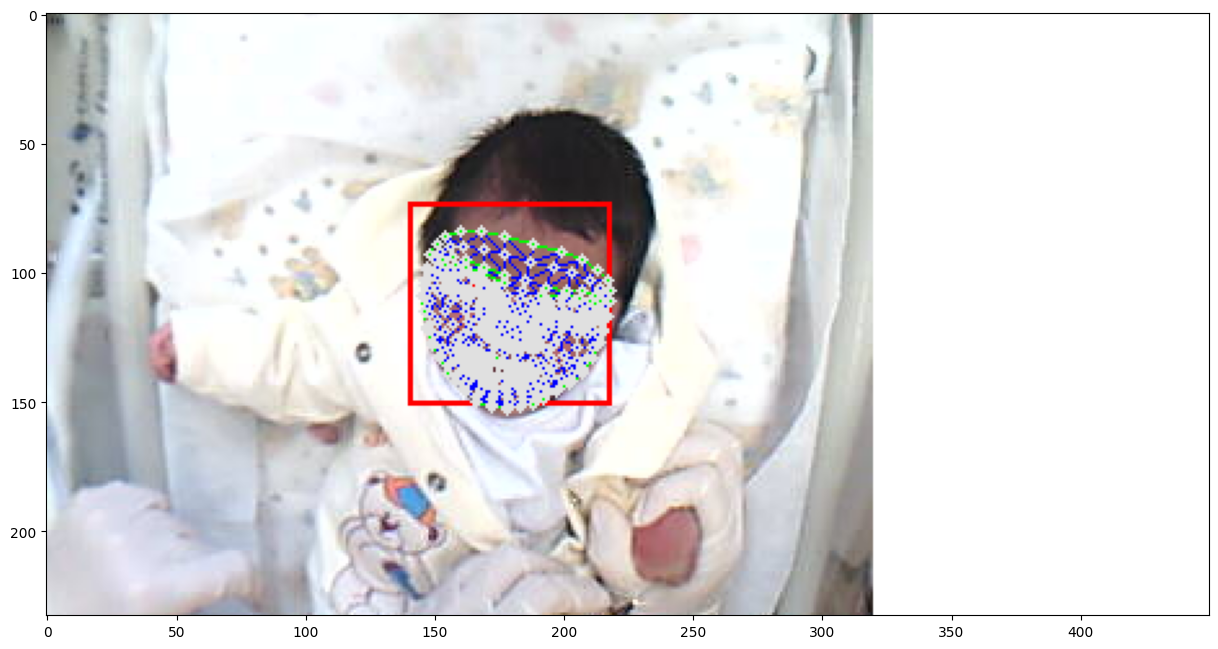

In [4]:
BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = FaceLandmarkerOptions(
  base_options=BaseOptions(model_asset_path=model_path),
  running_mode=VisionRunningMode.IMAGE)


with FaceLandmarker.create_from_options(options) as landmarker:
  # Load the input image from an image file.
  #mp_image = mp.Image.create_from_file(img_path)
  # Load the input image from a numpy array.
  numpy_image = cv2.imread(img_path)
  mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=numpy_image)

  # Perform face landmarking on the provided single image.
  # The face landmarker must be created with the image mode.
  face_landmarker_result = landmarker.detect(mp_image)

  annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), face_landmarker_result)
  fig = plt.figure(figsize=(15,15))
  plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

E0000 00:00:1707157086.698153     515 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
I0000 00:00:1707157086.698191     515 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
W0000 00:00:1707157086.698714     515 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
E0000 00:00:1707157086.701995     515 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1707157086.702016     515 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1707157086.702023     515 gl_context.cc:408] INTERNAL: ; 

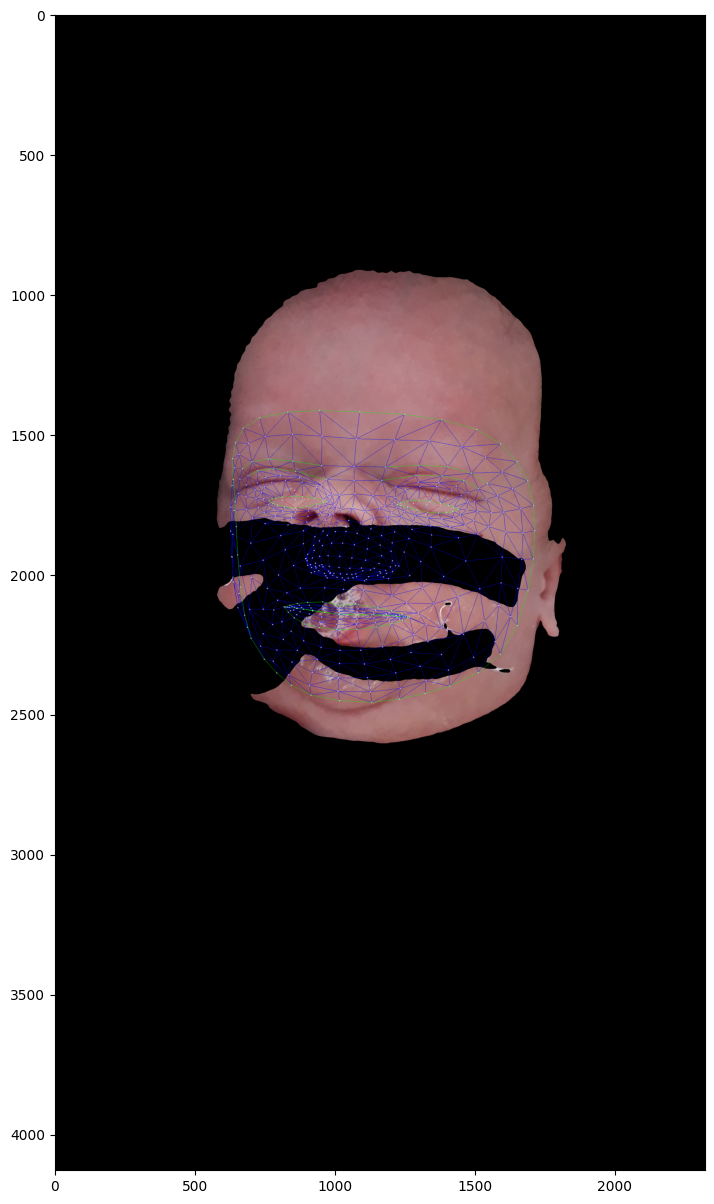

In [5]:
IMG_PATH = '/home/phdomingues/masters/data/datasets/Occlusion/images/f3.jpg'
MASK_PATH = '/home/phdomingues/masters/results/Occlusion/sam/f3.png'

img = cv2.imread(IMG_PATH)
mask = cv2.imread(str(MASK_PATH),0)
img_masked = cv2.bitwise_and(img, img, mask=mask)

BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = FaceLandmarkerOptions(
  base_options=BaseOptions(model_asset_path=model_path),
  running_mode=VisionRunningMode.IMAGE)


with FaceLandmarker.create_from_options(options) as landmarker:
  # Load the input image from an image file.
  #mp_image = mp.Image.create_from_file(img_path)
  # Load the input image from a numpy array.
  numpy_image = img_masked
  mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=numpy_image)

  # Perform face landmarking on the provided single image.
  # The face landmarker must be created with the image mode.
  face_landmarker_result = landmarker.detect(mp_image)

  annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), face_landmarker_result)
  fig = plt.figure(figsize=(15,15))
  plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))